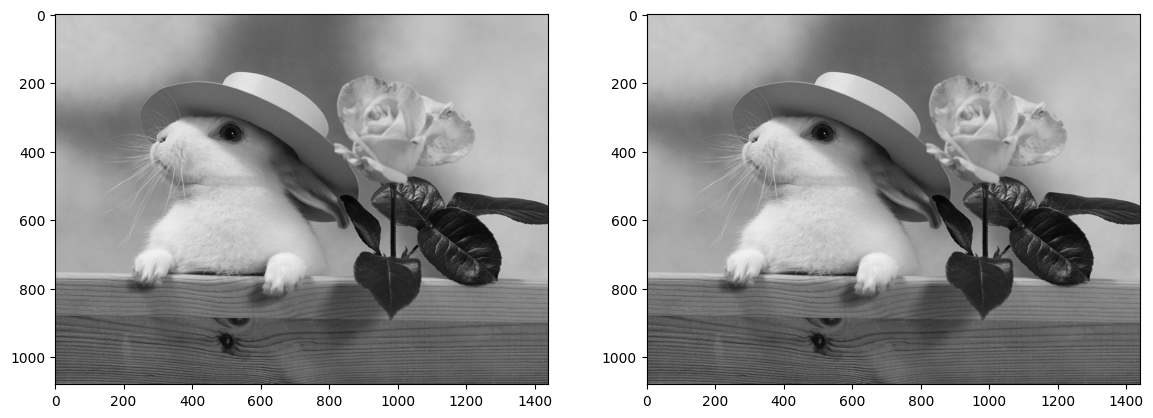

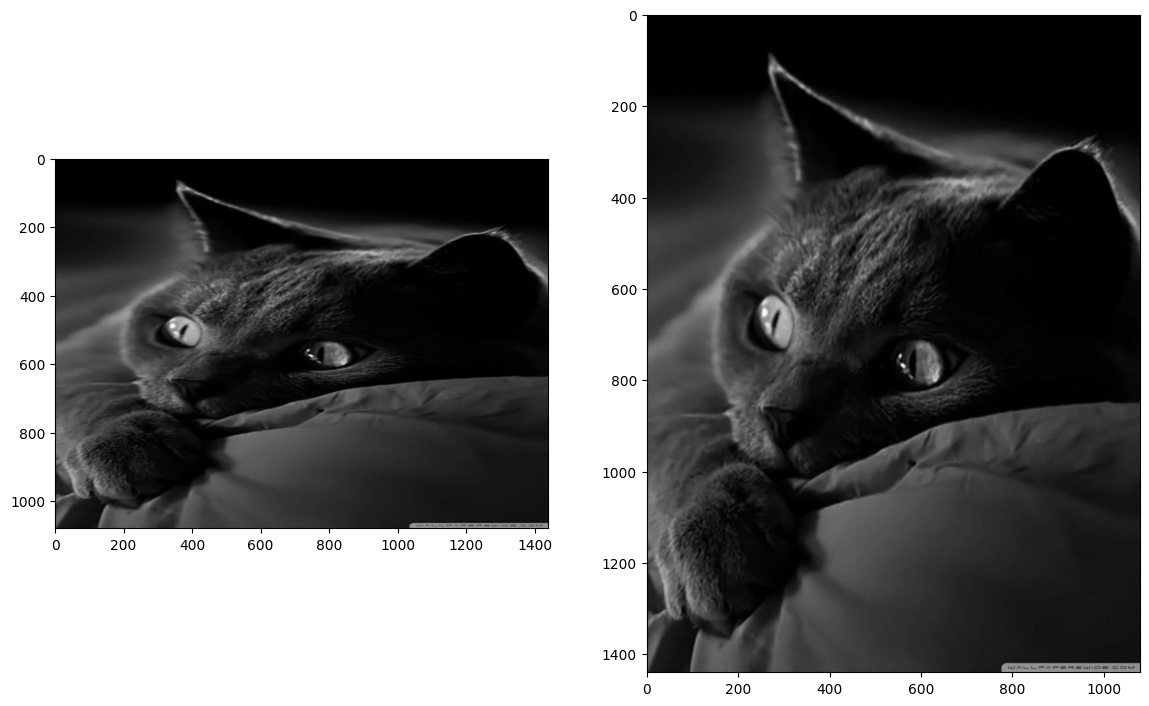

img1-dimensions :  (1080, 1440)
img2-dimentions :  (1080, 1440)


In [139]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img1_path = cv2.imread("static\IMG\img3.jpg", 0)
first_img= cv2.resize(img1_path, (1440, 1080))
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(first_img, cmap='gray')
plt.subplot(122)
plt.imshow(img1_path, cmap='gray')
plt.show()

img2_path = cv2.imread("static\IMG\img7.jpg", 0)
second_img= cv2.resize(img2_path, (1440, 1080))
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(second_img, cmap='gray')
plt.subplot(122)
plt.imshow(img2_path, cmap='gray')
plt.show()

print('img1-dimensions : ' , first_img.shape)
print('img2-dimentions : ' , second_img.shape)

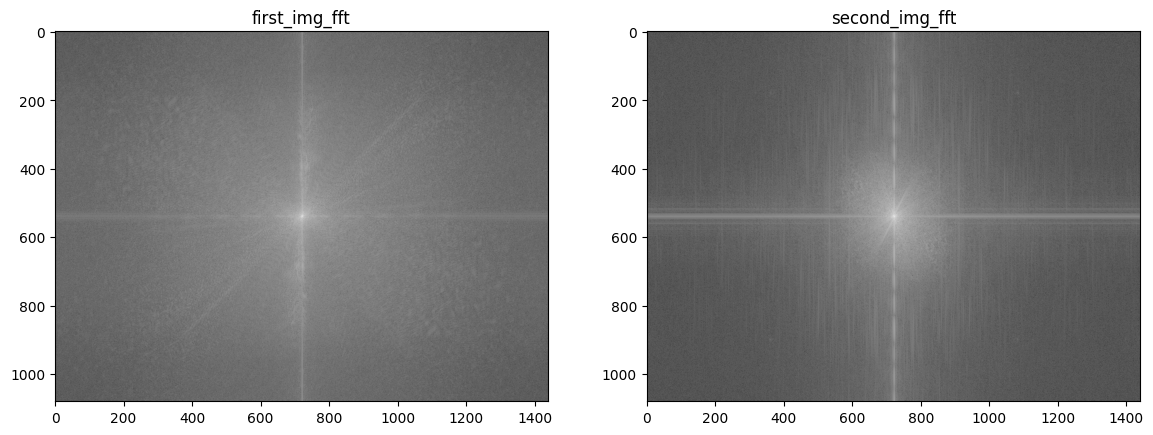

In [140]:
first_img_fft = np.fft.fftshift(np.fft.fft2(first_img))
second_img_fft = np.fft.fftshift(np.fft.fft2(second_img))

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.title("first_img_fft")
plt.imshow(np.log(np.abs(first_img_fft)), cmap='gray')
plt.subplot(122)
plt.title("second_img_fft")
plt.imshow(np.log(np.abs(second_img_fft)), cmap='gray')
plt.show()

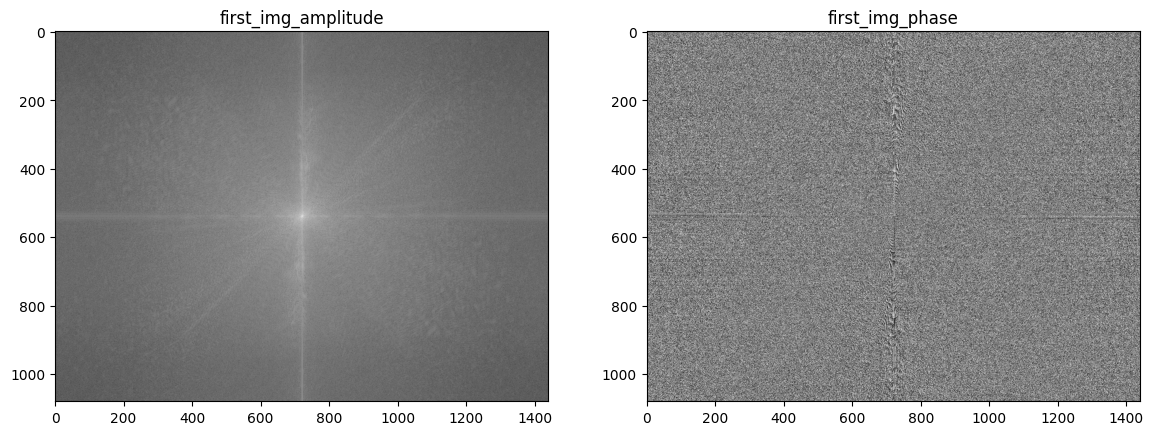

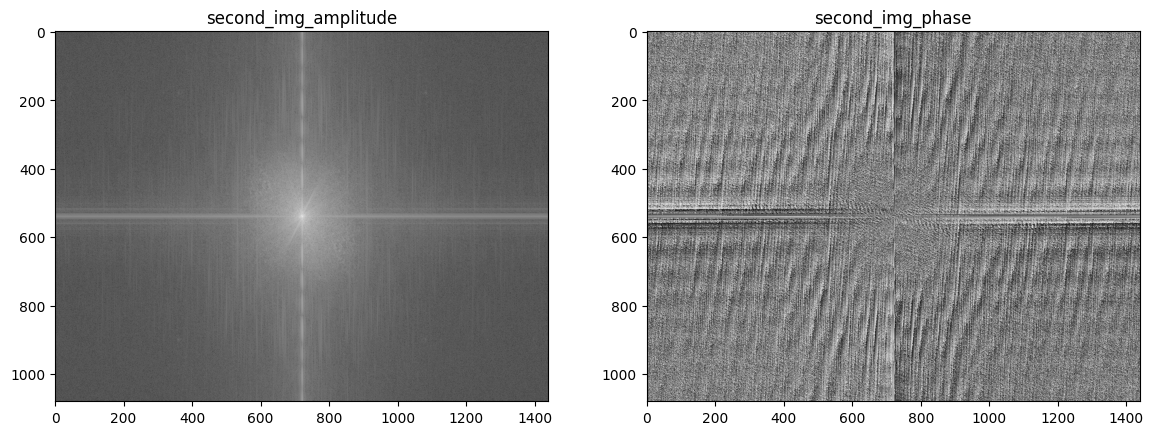

In [141]:
first_img_amplitude = np.sqrt(np.real(first_img_fft) ** 2 + np.imag(first_img_fft) ** 2)
# first_img_amplitude=np.abs(first_img_fft)
first_img_phase = np.arctan2(np.imag(first_img_fft), np.real(first_img_fft))
second_img_amplitude = np.sqrt(np.real(second_img_fft) ** 2 + np.imag(second_img_fft) ** 2)
second_img_phase = np.arctan2(np.imag(second_img_fft), np.real(second_img_fft))

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.title("first_img_amplitude")
plt.imshow(np.log(first_img_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.title("first_img_phase")
plt.imshow(first_img_phase, cmap='gray')

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.title("second_img_amplitude")
plt.imshow(np.log(second_img_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.title("second_img_phase")
plt.imshow(second_img_phase, cmap='gray')

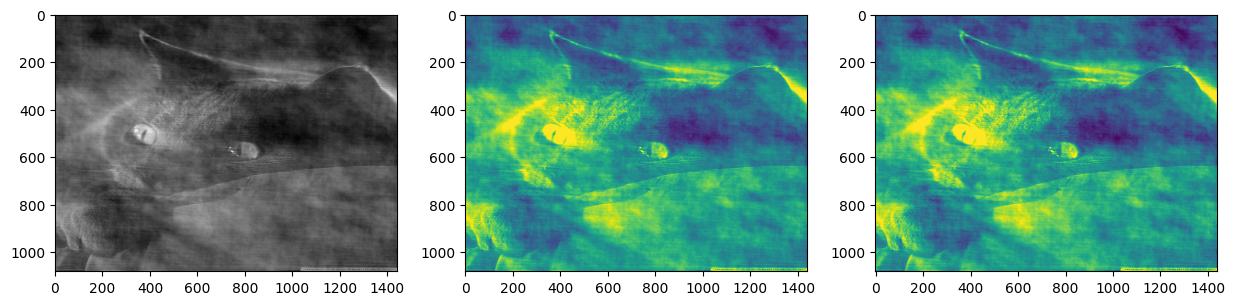

In [142]:
first_second_imgs_comb = np.multiply(first_img_amplitude, np.exp(1j * second_img_phase))
first_second_imgs = np.real(np.fft.ifft2(np.fft.ifftshift(first_second_imgs_comb)))  # drop imagniary as they are around 1e-14

# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(15, 20))
plt.subplot(131)
plt.imshow(np.abs(first_second_imgs), cmap='gray')
plt.subplot(132)
first_second_imgs_shift = first_second_imgs + first_second_imgs.min()
first_second_imgs_shift[first_second_imgs_shift>255] = 255
plt.imshow(first_second_imgs_shift)
plt.subplot(133)
first_second_imgs[first_second_imgs>255] = 255
first_second_imgs[first_second_imgs <0] = 0
plt.imshow(first_second_imgs)


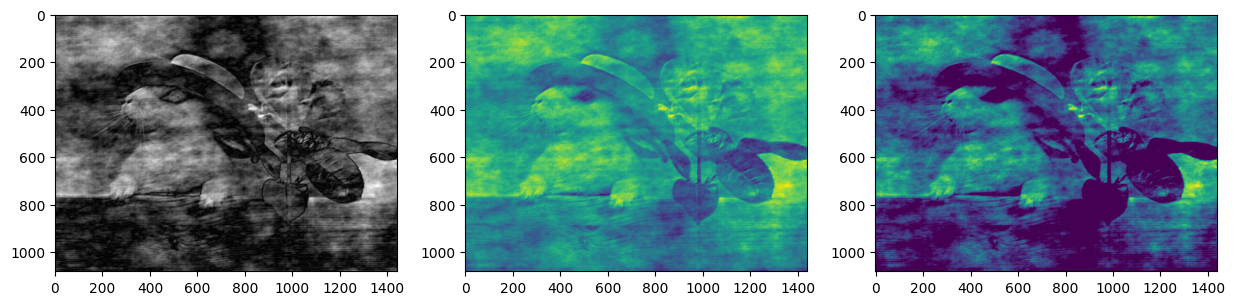

In [143]:
second_first_imgs_comb = np.multiply(second_img_amplitude, np.exp(1j * first_img_phase))
second_first_imgs = np.real(np.fft.ifft2(np.fft.ifftshift(second_first_imgs_comb)))  # drop imagniary as they are around 1e-14

# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(15, 20))
plt.subplot(131)
plt.imshow(np.abs(second_first_imgs), cmap='gray')
plt.subplot(132)
second_first_imgs_shift = second_first_imgs + second_first_imgs.min()
second_first_imgs_shift[second_first_imgs_shift>255] = 255
plt.imshow(second_first_imgs_shift)
plt.subplot(133)
second_first_imgs[second_first_imgs>255] = 255
second_first_imgs[second_first_imgs <0] = 0
plt.imshow(second_first_imgs)


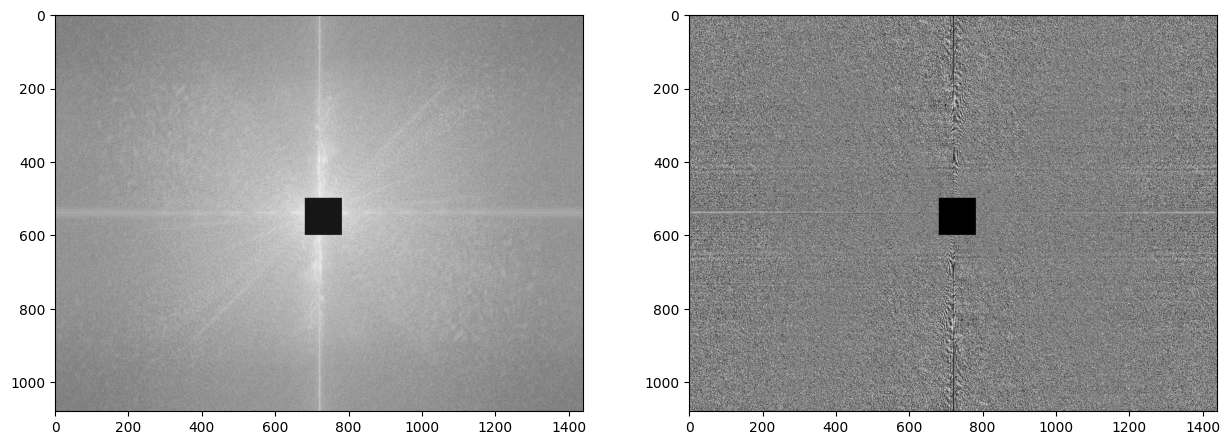

In [153]:
new_first_img_amplitude=first_img_amplitude.copy() #take a copy of the magnitude 
new_first_img_phase=first_img_phase.copy()#take a copy of the phase
for i in range(first_img_amplitude.shape[1]):
    for j in range(first_img_phase.shape[0]):
        if (i >=500 and i<=600 )and (j>=680 and j <=780 ):
            new_first_img_amplitude[i][j]=1
            new_first_img_phase[i][j]=0
plt.figure(figsize=(15, 20))
plt.subplot(121)
plt.imshow(np.log(new_first_img_amplitude), cmap='gray')

plt.subplot(122)
plt.imshow(np.abs(new_first_img_phase), cmap='gray')  
      

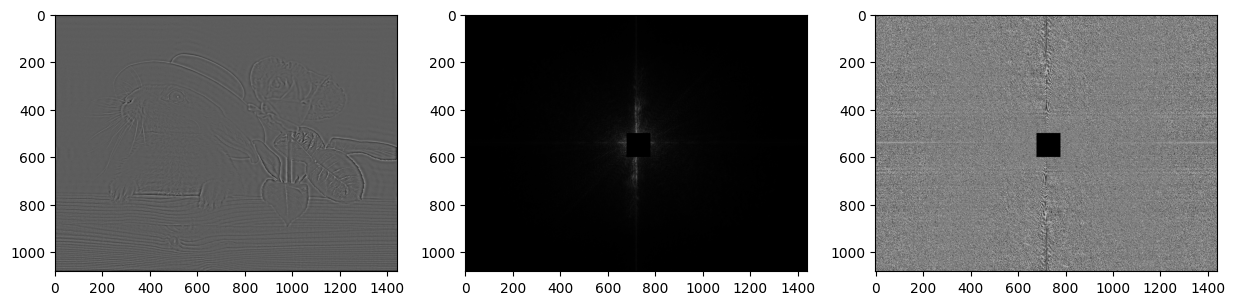

In [154]:
imgs_combine = np.multiply((new_first_img_amplitude), np.exp(1j * new_first_img_phase))
first_second_imgs = np.real(np.fft.ifft2(np.fft.ifftshift(imgs_combine)))
plt.figure(figsize=(15, 20))
plt.subplot(131)
plt.imshow(first_second_imgs, cmap='gray')

plt.subplot(132)
plt.imshow(np.abs(new_first_img_amplitude), cmap='gray') 

plt.subplot(133)
plt.imshow(np.abs(new_first_img_phase), cmap='gray') 
      